In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

2023-08-07 09:40:16.130232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X = np.linspace(-2*np.pi, 2*np.pi, 100).reshape(-1, 1) #creating input data

In [3]:
Y = np.sin(X) #true Y

In [4]:
print(X.shape)
print(Y.shape)

(100, 1)
(100, 1)


In [5]:
ANN = tf.keras.models.Sequential() #creating the Sequential instance

from tensorflow.keras.layers import Dense #importing Dense layers since we are building a desnely connected ANN

2023-08-07 09:40:18.472742: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 09:40:18.474365: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
ANN.add(Dense(units=1024, activation='relu')) #hidden layer 1 with 1024 nodes
ANN.add(Dense(units=512, activation='relu')) #hidden layer 2 with 512 nodes

ANN.add(Dense(units=1, activation='tanh')) #output layer with single node

In [7]:
ANN.compile(optimizer='adam', loss='MSE', metrics=['MSE']) #packing our network

In [8]:
model = ANN.fit(X, Y,epochs=700,batch_size=256 ,verbose=0)#fitting our model

In [9]:
for i in range(701):
    if i%100==99:
        print("after {} epoch, loss is: {}".format(i, model.history['loss'][i]))

after 99 epoch, loss is: 0.06630712747573853
after 199 epoch, loss is: 0.06578365713357925
after 299 epoch, loss is: 0.06468670070171356
after 399 epoch, loss is: 0.016599848866462708
after 499 epoch, loss is: 0.0020821671932935715
after 599 epoch, loss is: 0.0011236727004870772
after 699 epoch, loss is: 0.0015686240512877703


In [10]:
Y_hat = ANN.predict(X) #predicting X with our model

4/4 [==============================] - 0s 16ms/step


<Axes: >

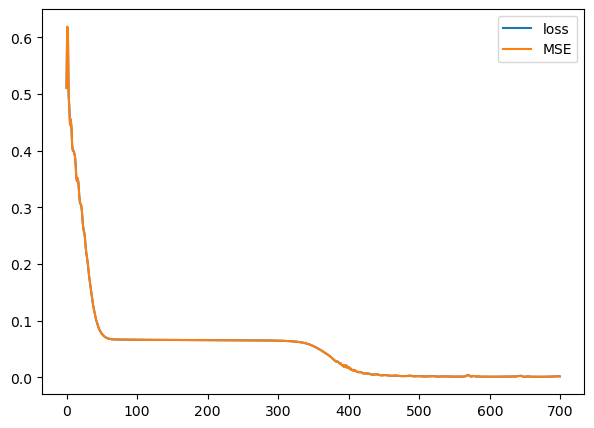

In [11]:
pd.DataFrame(model.history).plot(figsize=(7,5)) #both loss and metrics are the same, so we have only one graph

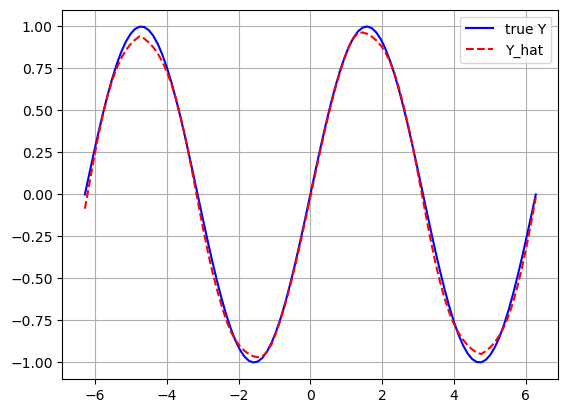

In [12]:
ax = plt.axes() #plotting the predicted and true output
ax.grid()
ax.plot(X, Y, 'b')
ax.plot(X, Y_hat, 'r--')
ax.legend(['true Y', 'Y_hat'])

### end.